In [1]:
!pip install PyMySQL
# https://github.com/PyMySQL/PyMySQL/

In [2]:
import pymysql.cursors
import warnings
import pandas as pd
warnings.filterwarnings('ignore')

In [3]:
def connect():
    # database credentials
    host = 'den1.mysql6.gear.host'
    db = 'situation'
    usr = 'situation'
    pwd = input()

    # connect to the database
    try: 
        return pymysql.connect(host=host, user=usr, password=pwd, database=db, 
            cursorclass=pymysql.cursors.DictCursor)
    except pymysql.Error as err:
        print("error %d: %s" %(err.args[0], err.args[1]))
        return ""

In [4]:
def get_tables(selected):
    # query all tables in database
    sql = "show tables;"
    retval = []

    # connect to database
    dbConnection = connect()

    # check for type, if not str proceed
    if not (type(dbConnection) == str):
        # execute query via cursor, fetch all data
        with dbConnection.cursor() as cursor:
          cursor.execute(sql)
          result = cursor.fetchall()

        # now try to find tables with parameter selected in name
        # and append to list
        for count in range(0, len(result)):
            for (key, value) in result[count].items():
                if (value.find(selected) != -1):
                    print(value)
                    retval.append(value)
    
    # return list
    return retval

In [5]:
def describe_table(myTable):
    sql = "describe " + myTable + ";"
    
    # connect to database
    dbConnection = connect()
    
    # check for type, if not str proceed
    if not (type(dbConnection) == str):
        # execute query via cursor, fetch all data
        with dbConnection.cursor() as cursor:
            cursor.execute(sql)
            result = cursor.fetchall()
        
        # now try to describe the table
        for count in range(0, len(result)):
            for (key, value) in result[count].items():
                print(key ,":", value, "; ", end="")
            print("")

In [6]:
myval = get_tables("e5_hplc_data")
print(myval)
cdb_data_source=[]

for input in myval:
    describe_table(input)
    cdb_data_source=pd.read_sql("select * from " + input + ";", connect())
    display(cdb_data_source)

e5_hplc_data
['e5_hplc_data']
Field : Compound ; Type : varchar(50) ; Null : YES ; Key :  ; Default : None ; Extra :  ; 
Field : Retention_Time ; Type : float ; Null : YES ; Key :  ; Default : None ; Extra :  ; 
Field : Intensity ; Type : float ; Null : YES ; Key :  ; Default : None ; Extra :  ; 


,Compound,Retention_Time,Intensity
0,Compound_1,0.000000,294.3890
1,Compound_1,0.416667,747.2610
2,Compound_1,0.833333,575.3470
3,Compound_1,1.250000,470.5460
4,Compound_1,1.666670,122.6310
...,...,...,...
745,Compound_30,8.333330,105.7170
746,Compound_30,8.750000,217.2700
747,Compound_30,9.166670,173.1970
748,Compound_30,9.583330,518.5310


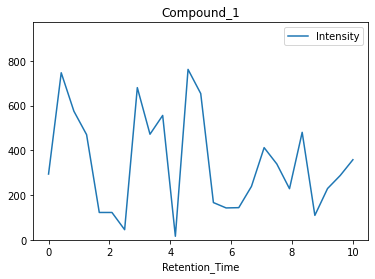

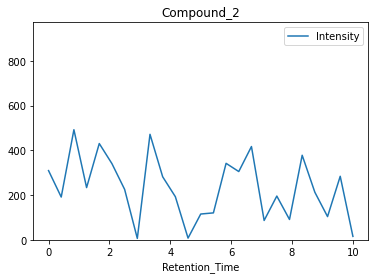

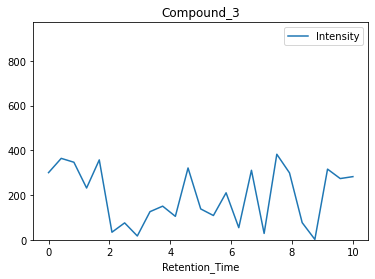

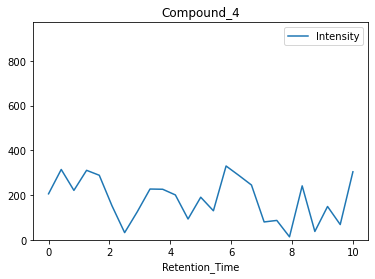

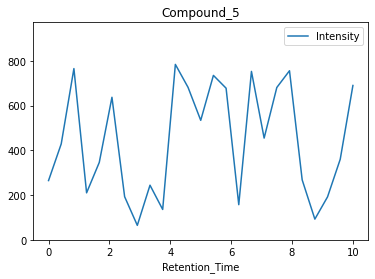

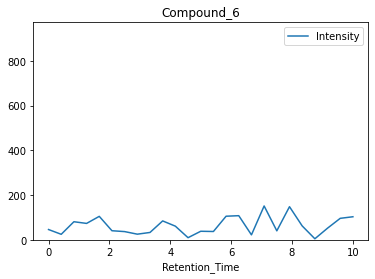

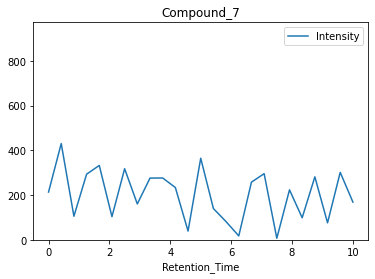

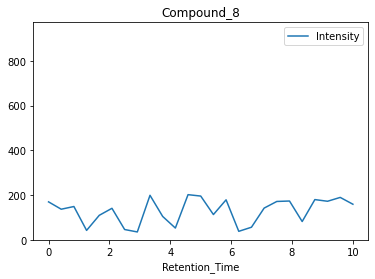

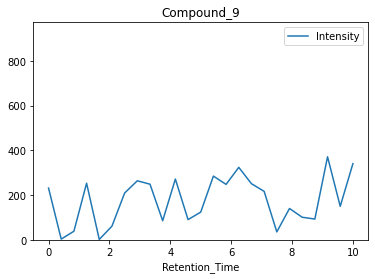

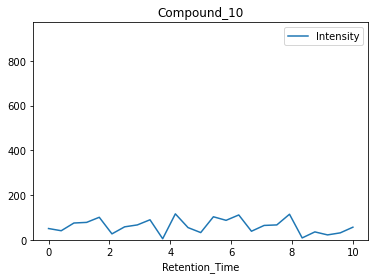

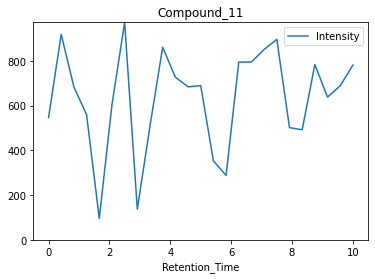

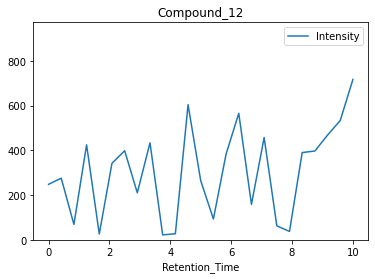

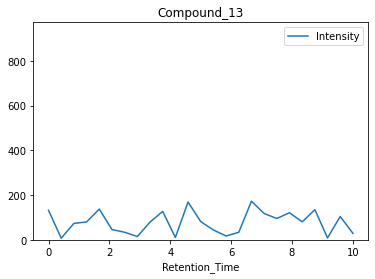

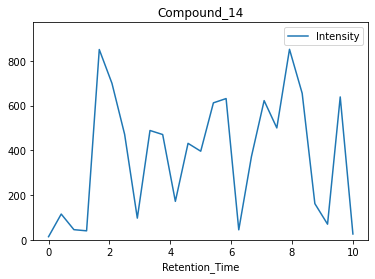

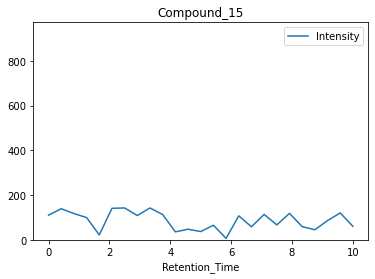

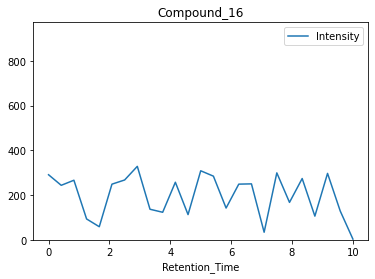

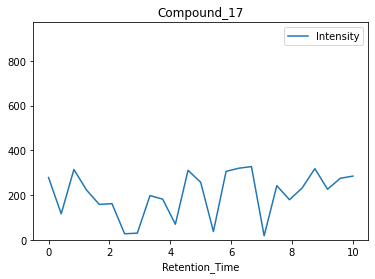

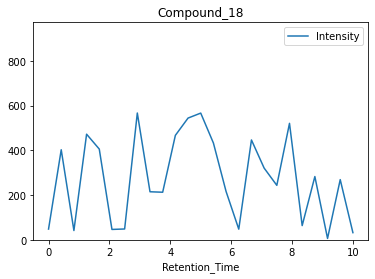

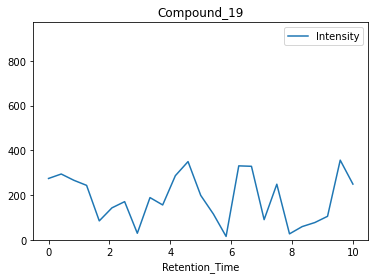

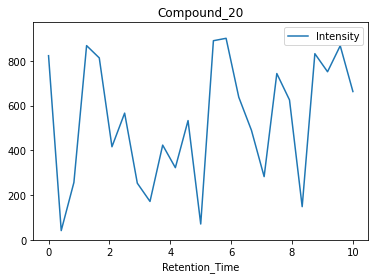

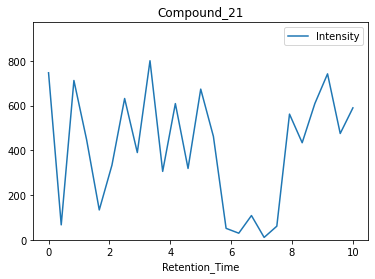

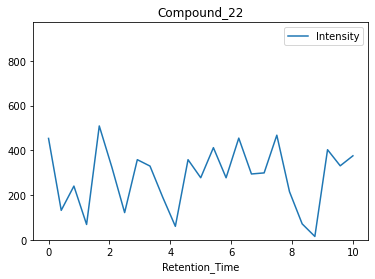

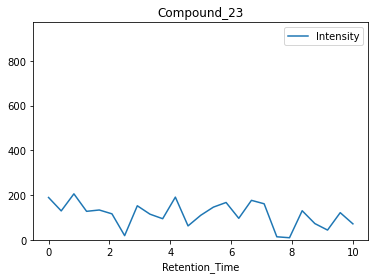

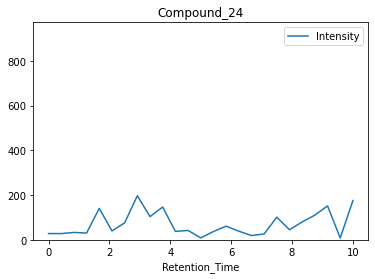

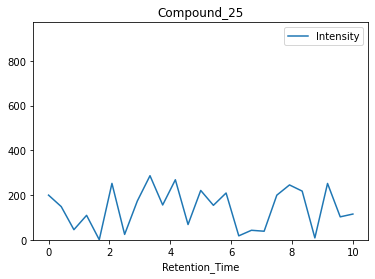

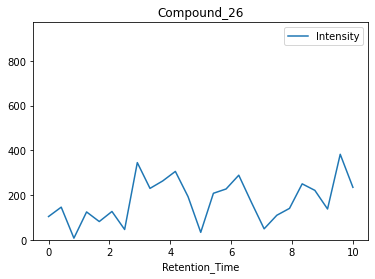

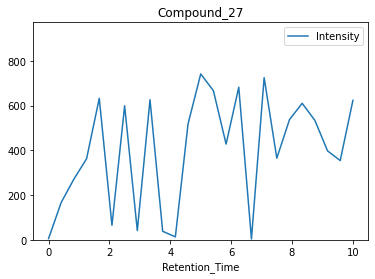

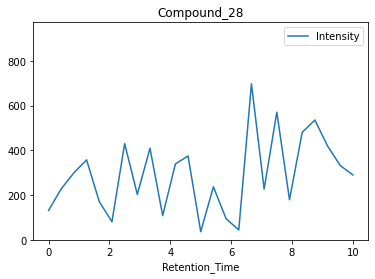

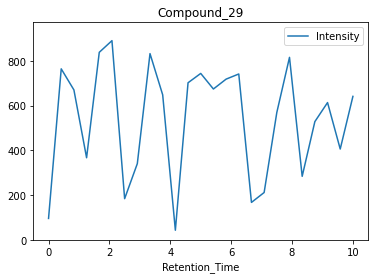

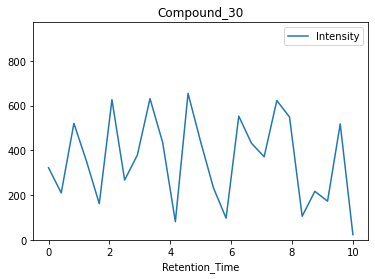

In [10]:
for compound in cdb_data_source[cdb_data_source.columns[0]].unique():
    cdb_data_source[cdb_data_source['Compound'] == compound].plot(x='Retention_Time',title=compound,ylim=[0,cdb_data_source['Intensity'].max()])

In [11]:
for compound in cdb_data_source[cdb_data_source.columns[0]].unique():
    display(cdb_data_source[cdb_data_source['Compound'] == compound].describe())

,Retention_Time,Intensity
count,25.000000,25.000000
mean,5.000000,346.467804
std,3.066584,224.181274
min,0.000000,16.179400
25%,2.500000,144.156000
50%,5.000000,294.389000
75%,7.500000,480.916000
max,10.000000,762.349000


,Retention_Time,Intensity
count,25.000000,25.000000
mean,5.000000,234.352434
std,3.066584,143.935929
min,0.000000,6.645750
25%,2.500000,115.678000
50%,5.000000,225.700000
75%,7.500000,340.834000
max,10.000000,492.599000


,Retention_Time,Intensity
count,25.000000,25.000000
mean,5.000000,196.883327
std,3.066584,127.597541
min,0.000000,2.142580
25%,2.500000,77.101700
50%,5.000000,210.566000
75%,7.500000,311.252000
max,10.000000,382.912000


,Retention_Time,Intensity
count,25.000000,25.000000
mean,5.000000,182.813628
std,3.066584,97.395822
min,0.000000,13.747400
25%,2.500000,93.405400
50%,5.000000,201.041000
75%,7.500000,245.388000
max,10.000000,330.382000


,Retention_Time,Intensity
count,25.000000,25.000000
mean,5.000000,444.684712
std,3.066584,251.362932
min,0.000000,64.971000
25%,2.500000,210.403000
50%,5.000000,429.234000
75%,7.500000,682.054000
max,10.000000,784.665000


,Retention_Time,Intensity
count,25.000000,25.000000
mean,5.000000,63.906977
std,3.066584,40.483618
min,0.000000,5.023710
25%,2.500000,37.107100
50%,5.000000,52.450800
75%,7.500000,96.421400
max,10.000000,151.657000


,Retention_Time,Intensity
count,25.000000,25.000000
mean,5.000000,204.178223
std,3.066584,116.138991
min,0.000000,7.248880
25%,2.500000,103.848000
50%,5.000000,223.785000
75%,7.500000,293.723000
max,10.000000,430.729000


,Retention_Time,Intensity
count,25.000000,25.000000
mean,5.000000,129.885600
std,3.066584,57.192762
min,0.000000,35.515900
25%,2.500000,82.115200
50%,5.000000,142.173000
75%,7.500000,173.834000
max,10.000000,202.240000


,Retention_Time,Intensity
count,25.000000,25.000000
mean,5.000000,177.831100
std,3.066584,109.657125
min,0.000000,1.933530
25%,2.500000,90.629200
50%,5.000000,209.616000
75%,7.500000,253.458000
max,10.000000,371.690000


,Retention_Time,Intensity
count,25.000000,25.000000
mean,5.000000,61.618738
std,3.066584,32.852376
min,0.000000,5.101640
25%,2.500000,35.766600
50%,5.000000,58.405600
75%,7.500000,87.483100
max,10.000000,116.362000


,Retention_Time,Intensity
count,25.000000,25.000000
mean,5.000000,634.336052
std,3.066584,231.126026
min,0.000000,95.427300
25%,2.500000,509.000000
50%,5.000000,684.469000
75%,7.500000,794.793000
max,10.000000,972.233000


,Retention_Time,Intensity
count,25.000000,25.000000
mean,5.000000,304.714476
std,3.066584,203.560619
min,0.000000,22.417700
25%,2.500000,93.389500
50%,5.000000,342.215000
75%,7.500000,434.262000
max,10.000000,717.251000


,Retention_Time,Intensity
count,25.000000,25.000000
mean,5.000000,78.306967
std,3.066584,51.797358
min,0.000000,7.597490
25%,2.500000,33.830200
50%,5.000000,80.201300
75%,7.500000,121.566000
max,10.000000,172.904000


,Retention_Time,Intensity
count,25.000000,25.000000
mean,5.000000,379.550460
std,3.066584,277.456954
min,0.000000,14.321500
25%,2.500000,97.345000
50%,5.000000,431.682000
75%,7.500000,622.731000
max,10.000000,852.207000


,Retention_Time,Intensity
count,25.000000,25.000000
mean,5.000000,86.816699
std,3.066584,40.887459
min,0.000000,6.779580
25%,2.500000,58.560400
50%,5.000000,99.765900
75%,7.500000,117.827000
max,10.000000,142.791000


,Retention_Time,Intensity
count,25.000000,25.000000
mean,5.000000,199.225024
std,3.066584,96.500545
min,0.000000,3.598100
25%,2.500000,123.510000
50%,5.000000,249.204000
75%,7.500000,274.384000
max,10.000000,328.848000


,Retention_Time,Intensity
count,25.000000,25.000000
mean,5.000000,204.009692
std,3.066584,102.791070
min,0.000000,18.381600
25%,2.500000,158.749000
50%,5.000000,226.362000
75%,7.500000,285.200000
max,10.000000,327.661000


,Retention_Time,Intensity
count,25.000000,25.000000
mean,5.000000,277.130102
std,3.066584,195.586797
min,0.000000,6.528350
25%,2.500000,48.781700
50%,5.000000,269.480000
75%,7.500000,446.859000
max,10.000000,567.318000


,Retention_Time,Intensity
count,25.000000,25.000000
mean,5.000000,187.853352
std,3.066584,109.065854
min,0.000000,15.537500
25%,2.500000,90.570500
50%,5.000000,189.157000
75%,7.500000,274.656000
max,10.000000,356.508000


,Retention_Time,Intensity
count,25.000000,25.000000
mean,5.000000,536.060740
std,3.066584,280.840269
min,0.000000,41.538000
25%,2.500000,282.908000
50%,5.000000,566.801000
75%,7.500000,813.701000
max,10.000000,901.397000


,Retention_Time,Intensity
count,25.000000,25.000000
mean,5.000000,412.701600
std,3.066584,257.817351
min,0.000000,11.115300
25%,2.500000,134.010000
50%,5.000000,448.441000
75%,7.500000,609.677000
max,10.000000,801.038000


,Retention_Time,Intensity
count,25.000000,25.000000
mean,5.000000,281.929876
std,3.066584,141.018750
min,0.000000,15.369900
25%,2.500000,191.259000
50%,5.000000,299.541000
75%,7.500000,375.979000
max,10.000000,509.463000


,Retention_Time,Intensity
count,25.000000,25.000000
mean,5.000000,114.435999
std,3.066584,55.715056
min,0.000000,9.630870
25%,2.500000,72.956800
50%,5.000000,121.726000
75%,7.500000,152.543000
max,10.000000,205.897000


,Retention_Time,Intensity
count,25.000000,25.000000
mean,5.000000,70.907343
std,3.066584,55.047868
min,0.000000,8.648670
25%,2.500000,30.542000
50%,5.000000,42.303600
75%,7.500000,104.272000
max,10.000000,197.293000


,Retention_Time,Intensity
count,25.000000,25.000000
mean,5.000000,142.643030
std,3.066584,91.804191
min,0.000000,0.755152
25%,2.500000,45.680500
50%,5.000000,154.598000
75%,7.500000,218.138000
max,10.000000,287.001000


,Retention_Time,Intensity
count,25.000000,25.000000
mean,5.000000,177.327057
std,3.066584,98.992578
min,0.000000,7.787620
25%,2.500000,110.105000
50%,5.000000,167.484000
75%,7.500000,235.041000
max,10.000000,382.768000


,Retention_Time,Intensity
count,25.000000,25.000000
mean,5.000000,400.755223
std,3.066584,256.101002
min,0.000000,3.943200
25%,2.500000,167.648000
50%,5.000000,428.543000
75%,7.500000,623.905000
max,10.000000,741.958000


,Retention_Time,Intensity
count,25.000000,25.000000
mean,5.000000,291.402772
std,3.066584,172.932976
min,0.000000,36.535600
25%,2.500000,170.899000
50%,5.000000,290.348000
75%,7.500000,409.773000
max,10.000000,697.922000


,Retention_Time,Intensity
count,25.000000,25.000000
mean,5.000000,540.037348
std,3.066584,258.136778
min,0.000000,43.237100
25%,2.500000,340.926000
50%,5.000000,641.690000
75%,7.500000,741.794000
max,10.000000,890.846000


,Retention_Time,Intensity
count,25.000000,25.000000
mean,5.000000,359.160104
std,3.066584,194.827451
min,0.000000,23.372100
25%,2.500000,210.060000
50%,5.000000,371.822000
75%,7.500000,521.084000
max,10.000000,655.063000


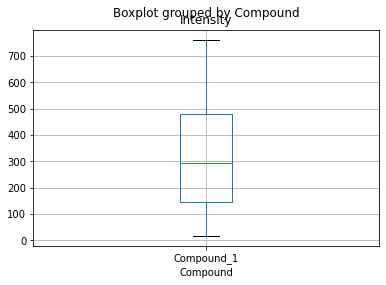

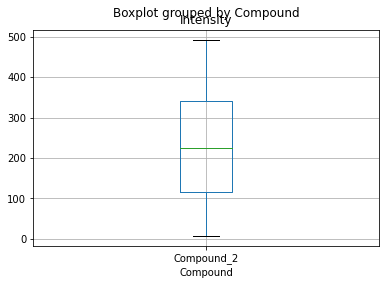

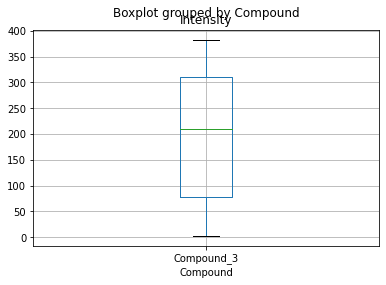

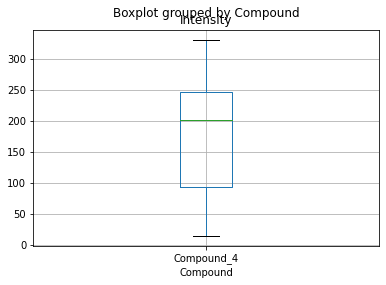

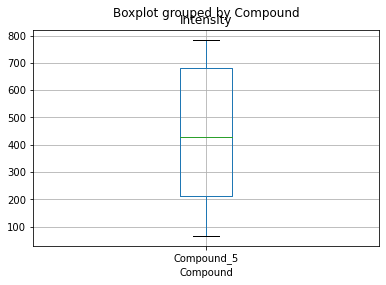

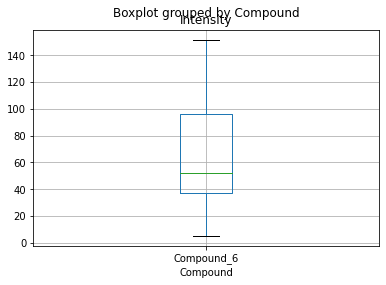

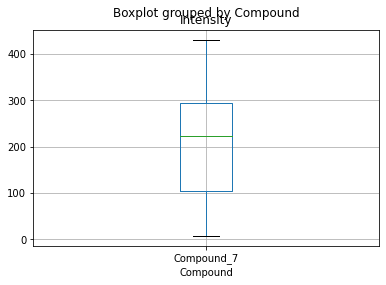

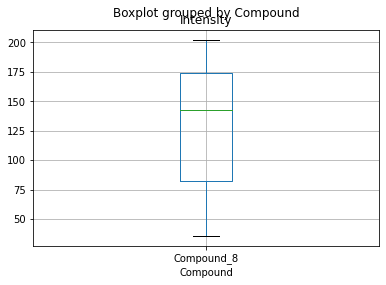

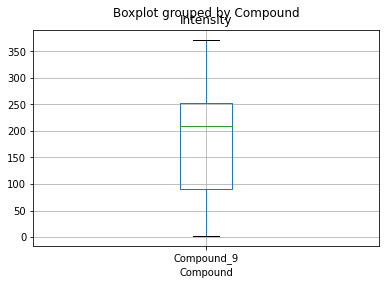

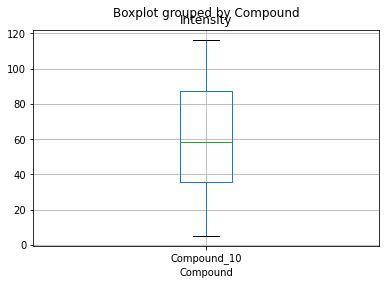

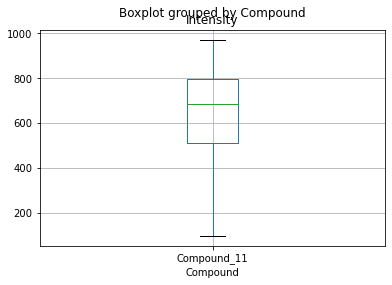

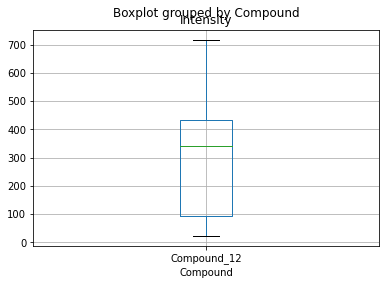

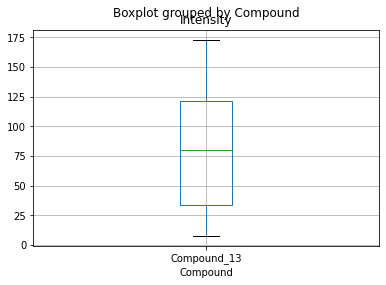

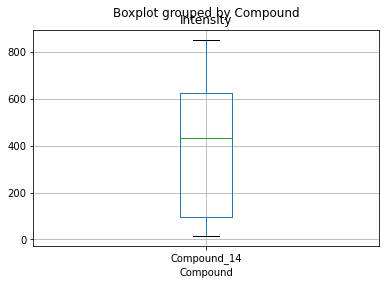

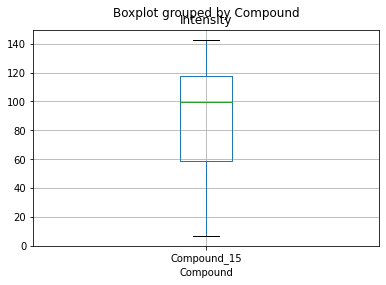

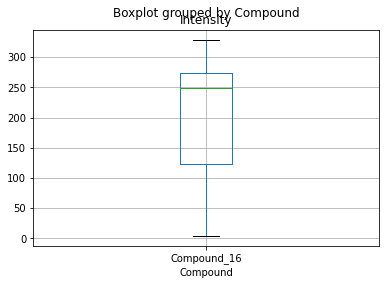

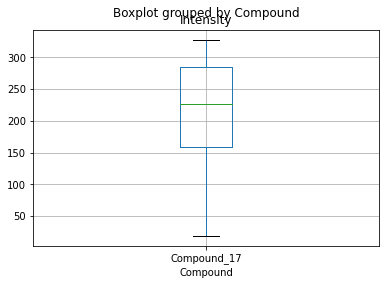

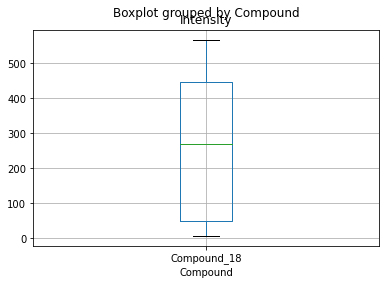

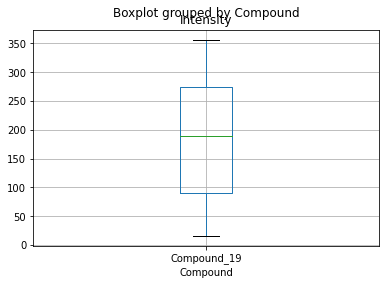

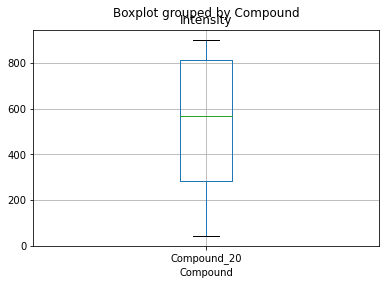

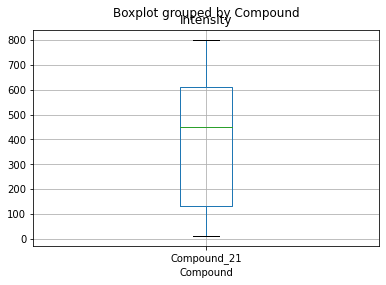

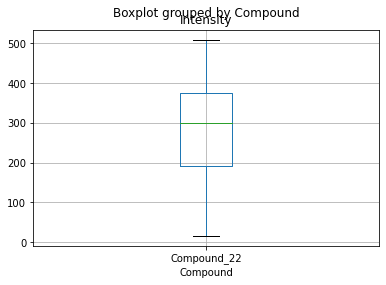

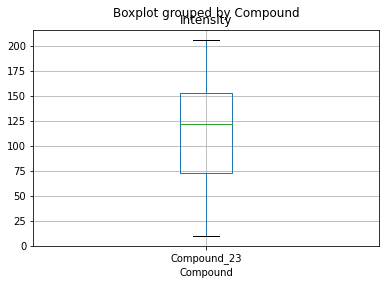

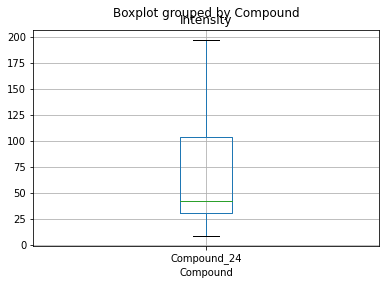

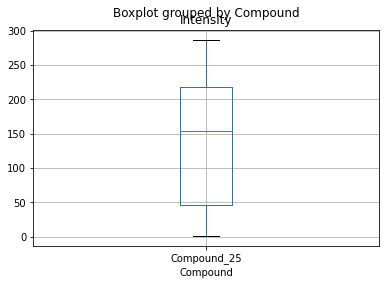

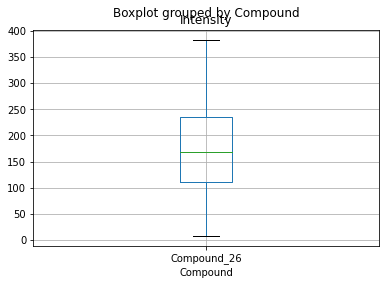

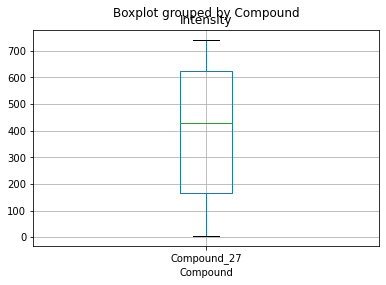

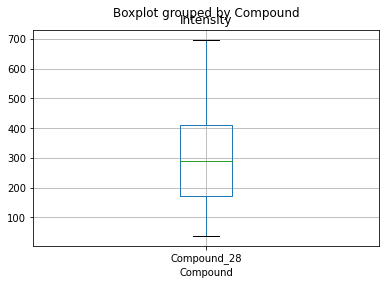

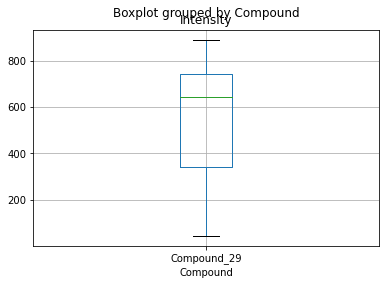

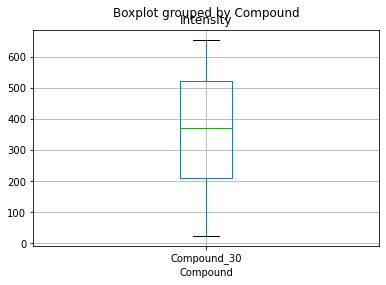

In [20]:
for compound in cdb_data_source[cdb_data_source.columns[0]].unique():
    cdb_data_source[cdb_data_source['Compound'] == compound].boxplot(by='Compound',column=['Intensity'])